<a href="https://colab.research.google.com/github/wzooom/minecraft_texture_generator/blob/main/texture_generator_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting DTD...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0497 - val_loss: 0.0499
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0498 - val_loss: 0.0498
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0491 - val_loss: 0.0501
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0489 - val_loss: 0.0500
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0486 - val_loss: 0.0504
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0488 - val_loss: 0.0506
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0476 - val_loss: 0.0513
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0482 - val_loss: 0.0503
Epoch 9/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0478 - val_loss: 0.0521
Epoch 10/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0466 - val_loss: 0.0517
Epoch 11/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0449 - val_loss: 0.0514
Epoch 12/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/ste

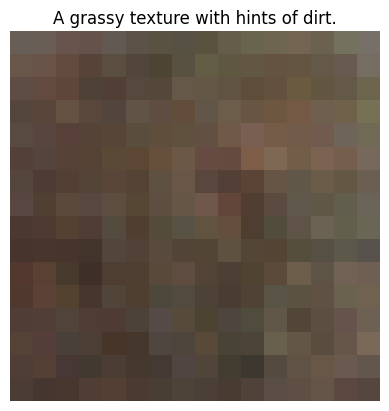

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import urllib.request
import tarfile
from PIL import Image

def preprocess_description(description):
    """Convert textual description into a numerical feature vector."""
    # Placeholder: Use pretrained embeddings like Word2Vec, GloVe, or BERT in a real implementation.
    return np.random.rand(128)

def build_texture_model(input_dim):
    """Build a neural network to generate 16x16 textures."""
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dense(512, activation='relu'),
        Dense(16 * 16 * 3, activation='sigmoid'),  # Output a 16x16 RGB texture
        Reshape((16, 16, 3))
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

def download_and_prepare_dtd():
    """Download and prepare the Describable Textures Dataset (DTD)."""
    url = "https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz"
    dataset_dir = "dtd_dataset"
    tar_file = "dtd.tar.gz"

    # Download DTD if not already downloaded
    if not os.path.exists(tar_file):
        print("Downloading DTD...")
        urllib.request.urlretrieve(url, tar_file)

    # Extract DTD if not already extracted
    if not os.path.exists(dataset_dir):
        print("Extracting DTD...")
        with tarfile.open(tar_file, 'r:gz') as tar_ref:
            tar_ref.extractall(path=".")

    # Load texture paths and descriptions
    texture_dir = os.path.join("dtd", "images")
    categories = os.listdir(texture_dir)
    descriptions, texture_paths = [], []

    for category in categories:
        category_dir = os.path.join(texture_dir, category)
        if os.path.isdir(category_dir):
            for file_name in os.listdir(category_dir):
                if file_name.endswith(('.jpg', '.png', '.jpeg')):
                    texture_paths.append(os.path.join(category_dir, file_name))
                    descriptions.append(f"A texture that is {category}.")

    return descriptions, texture_paths

def combine_datasets(dtd_features, dtd_textures, png_features, png_textures):
    """Combine the DTD and PNG datasets."""
    combined_features = np.concatenate((dtd_features, png_features), axis=0)
    combined_textures = np.concatenate((dtd_textures, png_textures), axis=0)
    return combined_features, combined_textures


def load_dtd_dataset():
    """Load DTD dataset and preprocess it."""
    descriptions, texture_paths = download_and_prepare_dtd()
    features = np.array([preprocess_description(desc) for desc in descriptions])

    textures = []
    for path in texture_paths:
        img = Image.open(path).convert('RGB').resize((16, 16))  # Resize to 16x16
        textures.append(np.array(img) / 255.0)  # Normalize to [0, 1]

    textures = np.array(textures)
    return features, textures

def split_dataset(features, textures):
    """Split dataset into training, validation, and testing sets."""
    X_train, X_temp, y_train, y_temp = train_test_split(features, textures, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Load DTD dataset
features, textures = load_dtd_dataset()

# Split the dataset
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(features, textures)

# Build the model
input_dim = 128
model = build_texture_model(input_dim)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

def generate_texture(description):
    """Generate a texture based on a description."""
    processed_description = preprocess_description(description)
    processed_description = np.expand_dims(processed_description, axis=0)  # Add batch dimension
    texture = model.predict(processed_description)[0]
    return texture

# Example usage
description = "A grassy texture with hints of dirt."
generated_texture = generate_texture(description)

# Display the generated texture
plt.imshow(generated_texture)
plt.title(description)
plt.axis('off')
plt.show()